In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [32]:
raw_data = pd.read_csv('project.csv', encoding= 'unicode_escape')

In [33]:
raw_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [34]:
data_1 = raw_data[['Ship Mode','Segment','City','State','Country','Market','Region','Category','Sub-Category','Product Name','Sales','Quantity','Discount','Profit','Shipping Cost','Order Priority']]
data_1.head()

,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,Standard Class,Consumer,Constantine,Constantine,Algeria,Africa,Africa,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,Standard Class,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,Second Class,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,Second Class,Home Office,Stockholm,Stockholm,Sweden,EU,North,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,Standard Class,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [35]:
data_1.describe(include = 'all')

,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290
unique,4,3,3636,1094,147,7,13,3,17,3788,NaN,NaN,NaN,NaN,NaN,4
top,Standard Class,Consumer,New York City,California,United States,APAC,Central,Office Supplies,Binders,Staples,NaN,NaN,NaN,NaN,NaN,Medium
freq,30775,26518,915,2001,9994,11002,11117,31273,6152,227,NaN,NaN,NaN,NaN,NaN,29433
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246.490581,3.476545,0.142908,28.610982,26.375915,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,487.565361,2.278766,0.212280,174.340972,57.296804,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.758625,2.000000,0.000000,0.000000,2.610000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.053000,3.000000,0.000000,9.240000,7.790000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,251.053200,5.000000,0.200000,36.810000,24.450000,NaN


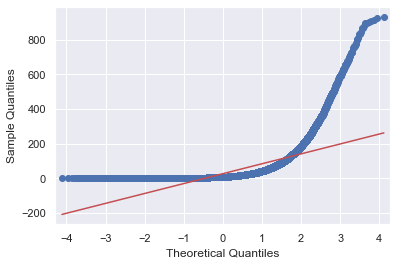

In [36]:
from statsmodels.graphics.gofplots import qqplot
qqplot(data_1['Shipping Cost'], line= 's')
plt.show()

In [37]:
data_1['shipping cost per unit'] = data_1['Shipping Cost']/data_1['Quantity']
data_1['shipping cost per unit'].describe()

C:\Users\Kumar Suyash Rituraj\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


count    51290.000000
mean         7.777093
std         14.755042
min          0.000000
25%          1.000000
50%          2.740000
75%          7.958750
max        363.870000
Name: shipping cost per unit, dtype: float64

In [43]:

q = data_1['shipping cost per unit'].quantile(0.75)
data_2 = data_1[data_1['shipping cost per unit']<q]

data_2.describe(include='all')

,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,shipping cost per unit
count,34618,34618,34618,34618,34618,34618,34618,34618,34618,34618,34618.000000,34618.000000,34618.000000,34618.000000,34618.000000,34618,34618.000000
unique,4,3,3372,1055,145,7,13,3,17,3264,NaN,NaN,NaN,NaN,NaN,4,NaN
top,Standard Class,Consumer,New York City,California,United States,US,Central,Office Supplies,Binders,Staples,NaN,NaN,NaN,NaN,NaN,Medium,NaN
freq,22274,17868,654,1438,7365,7365,7596,26688,5735,224,NaN,NaN,NaN,NaN,NaN,21975,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.241402,3.494772,0.158024,7.201262,6.480336,NaN,1.868039
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214.999256,2.294968,0.226990,75.267804,7.303102,NaN,1.448333
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-4088.376000,0.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.880000,2.000000,0.000000,-0.857450,1.680000,NaN,0.676667
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.320000,3.000000,0.000000,5.741400,3.920000,NaN,1.450000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.960000,5.000000,0.200000,17.940000,8.570000,NaN,2.803214


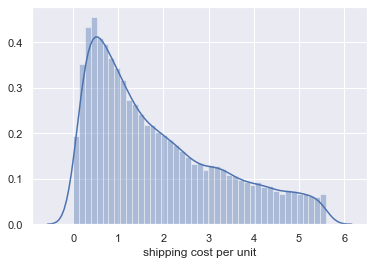

In [44]:
sns.distplot(data_2['shipping cost per unit'])

In [54]:

q = data_2['Sales'].quantile(0.75)
data_3 = data_2[data_2['Sales']<q]

data_3.describe(include='all')

,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,shipping cost per unit
count,25962,25962,25962,25962,25962,25962,25962,25962,25962,25962,25962.000000,25962.00000,25962.000000,25962.000000,25962.000000,25962,25962.000000
unique,4,3,3146,1022,144,7,13,3,17,2710,NaN,NaN,NaN,NaN,NaN,4,NaN
top,Standard Class,Consumer,New York City,California,United States,US,Central,Office Supplies,Binders,Staples,NaN,NaN,NaN,NaN,NaN,Medium,NaN
freq,16141,13374,531,1151,6014,6014,5462,21985,5055,215,NaN,NaN,NaN,NaN,NaN,15578,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.691444,2.93036,0.171761,2.097113,3.718113,NaN,1.475798
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.658944,1.88905,0.238751,20.238870,3.446326,NaN,1.235876
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444000,1.00000,0.000000,-344.412000,0.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.242000,2.00000,0.000000,-1.675650,1.290000,NaN,0.540000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.500000,2.00000,0.000000,4.115550,2.720000,NaN,1.080000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.600000,4.00000,0.400000,11.080000,5.030000,NaN,2.076667


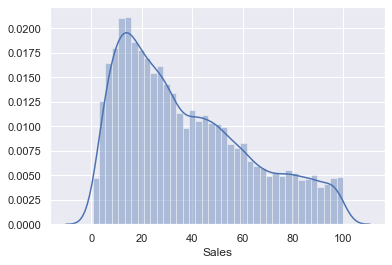

In [55]:
sns.distplot(data_3['Sales'])

In [56]:
ship = pd.get_dummies(data_3['Ship Mode'])

In [57]:
segment = pd.get_dummies(data_3['Segment'])

In [58]:
category = pd.get_dummies(data_3['Category'])

In [59]:
market = pd.get_dummies(data_3['Market'])

In [60]:
data_clean = data_3[['Sales','Quantity','Discount','Profit']]
data_clean

,Sales,Quantity,Discount,Profit
2,66.120,4,0.0,29.6400
3,44.865,3,0.5,-26.0550
5,55.242,2,0.1,15.3420
14,40.680,3,0.0,11.7900
15,81.984,2,0.4,-19.1360
...,...,...,...,...
51285,13.904,2,0.2,4.5188
51286,3.990,1,0.0,0.4200
51287,26.400,3,0.0,12.3600
51288,7.120,1,0.0,0.5600


In [85]:
data3 = pd.concat([data_clean, segment, category, market, data_2['shipping cost per unit']], axis=1)
data4 = data3.dropna()
data4.head()

,Sales,Quantity,Discount,Profit,Consumer,Corporate,Home Office,Furniture,Office Supplies,Technology,APAC,Africa,Canada,EMEA,EU,LATAM,US,shipping cost per unit
2,66.120,4.0,0.0,29.640,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.042500
3,44.865,3.0,0.5,-26.055,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.606667
5,55.242,2.0,0.1,15.342,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.900000
14,40.680,3.0,0.0,11.790,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.710000
15,81.984,2.0,0.4,-19.136,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.105000


In [84]:
y = data4['shipping cost per unit']
x1 = data3.drop(data3.columns[17], axis = 1)

import statsmodels.api as sm

x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()


MissingDataError: exog contains inf or nans

In [73]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler
standardized_data = pd.DataFrame(std_scaler.fit_transform(data_clean), columns = data_clean.columns)

standardized_data['shipping cost per unit'] = data_3['shipping cost per unit']
std = standardized_data.dropna()
std

,Sales,Quantity,Discount,Profit,shipping cost per unit
2,0.684007,-0.492511,-0.300575,0.654441,2.042500
3,0.116475,0.036866,-0.719430,0.478934,1.606667
5,1.582658,0.036866,-0.719430,0.901396,0.900000
14,1.007877,1.624996,1.793696,-1.830706,3.710000
15,-0.519807,-1.021888,-0.300575,0.336334,3.105000
...,...,...,...,...,...
25942,1.150052,1.095620,-0.719430,1.119298,1.070000
25943,1.337125,0.036866,-0.719430,0.109835,0.930000
25944,-0.578034,0.566243,1.374842,-0.420838,0.890000
25945,-0.097100,-0.492511,-0.719430,0.347007,0.860000


In [74]:
data3 = pd.concat([std, segment, category, market], axis=1)
data3

,Sales,Quantity,Discount,Profit,shipping cost per unit,Consumer,Corporate,Home Office,Furniture,Office Supplies,Technology,APAC,Africa,Canada,EMEA,EU,LATAM,US
2,0.684007,-0.492511,-0.300575,0.654441,2.042500,1,0,0,0,1,0,0,0,0,1,0,0,0
3,0.116475,0.036866,-0.719430,0.478934,1.606667,0,0,1,0,1,0,0,0,0,0,1,0,0
5,1.582658,0.036866,-0.719430,0.901396,0.900000,1,0,0,0,1,0,1,0,0,0,0,0,0
14,1.007877,1.624996,1.793696,-1.830706,3.710000,1,0,0,0,1,0,1,0,0,0,0,0,0
15,-0.519807,-1.021888,-0.300575,0.336334,3.105000,0,1,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,NaN,NaN,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0,0,0,1
51286,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1,0,0,1,0,0,0,0,0
51287,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1,0,0,0,0,0,0,1,0
51288,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1,0,0,0,0,0,0,1,0


In [75]:
df1 = data3.dropna()
df1.isnull().sum()

Sales                     0
Quantity                  0
Discount                  0
Profit                    0
shipping cost per unit    0
Consumer                  0
Corporate                 0
Home Office               0
Furniture                 0
Office Supplies           0
Technology                0
APAC                      0
Africa                    0
Canada                    0
EMEA                      0
EU                        0
LATAM                     0
US                        0
dtype: int64

In [64]:
first_class = data3[['Sales','Discount','Profit','Shipping Cost', 'First Class']]
same_day = data3[['Sales','Discount','Profit','Shipping Cost', 'Same Day']]
second_class = data3[['Sales','Discount','Profit','Shipping Cost', 'Second Class']]
standard_class = data3[['Sales','Discount','Profit','Shipping Cost', 'Standard Class']]

KeyError: "['Shipping Cost', 'First Class'] not in index"

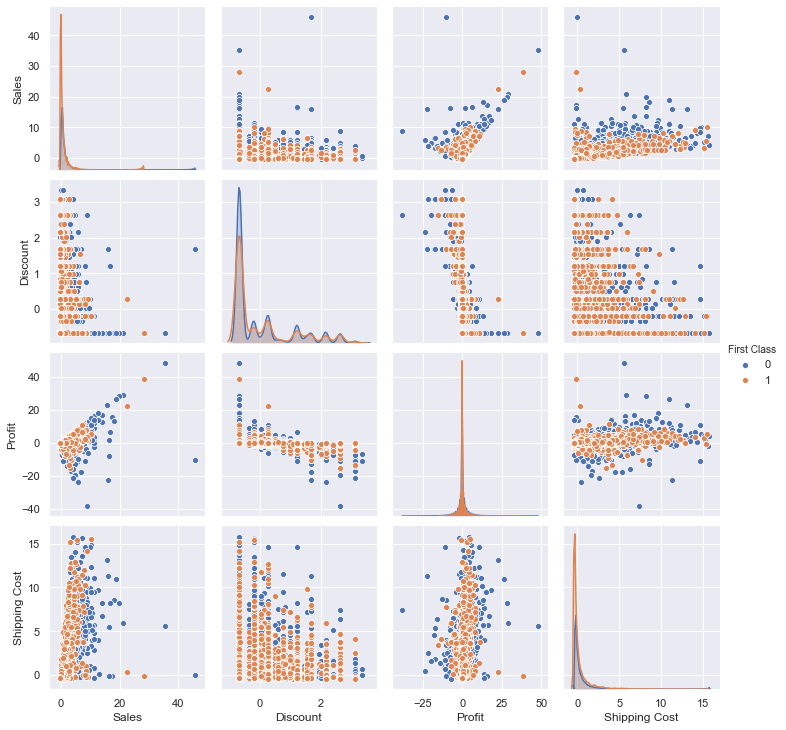

In [69]:
sns.pairplot(first_class, hue = 'First Class')
plt.show()

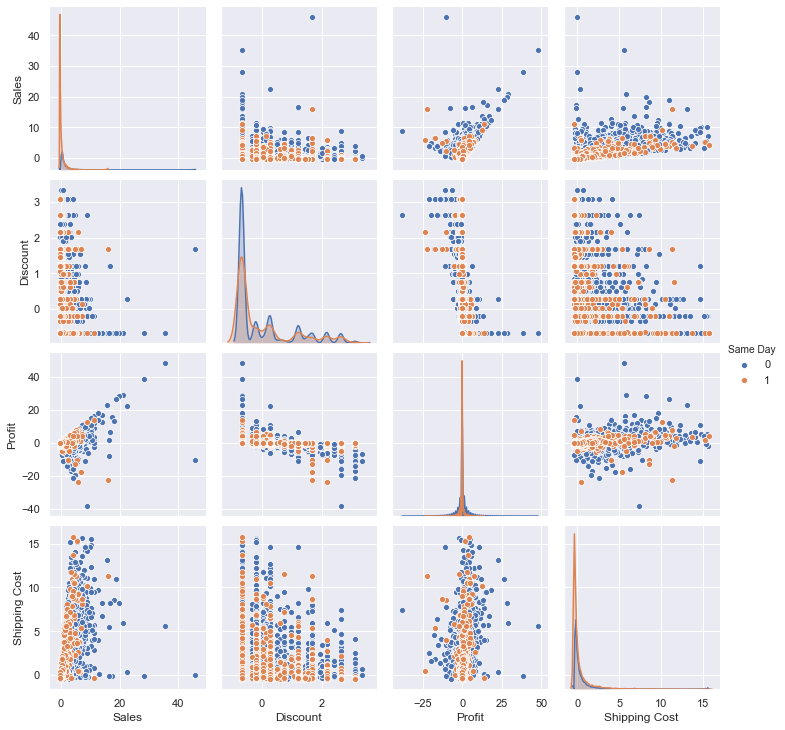

In [70]:
sns.pairplot(same_day, hue = 'Same Day')
plt.show()

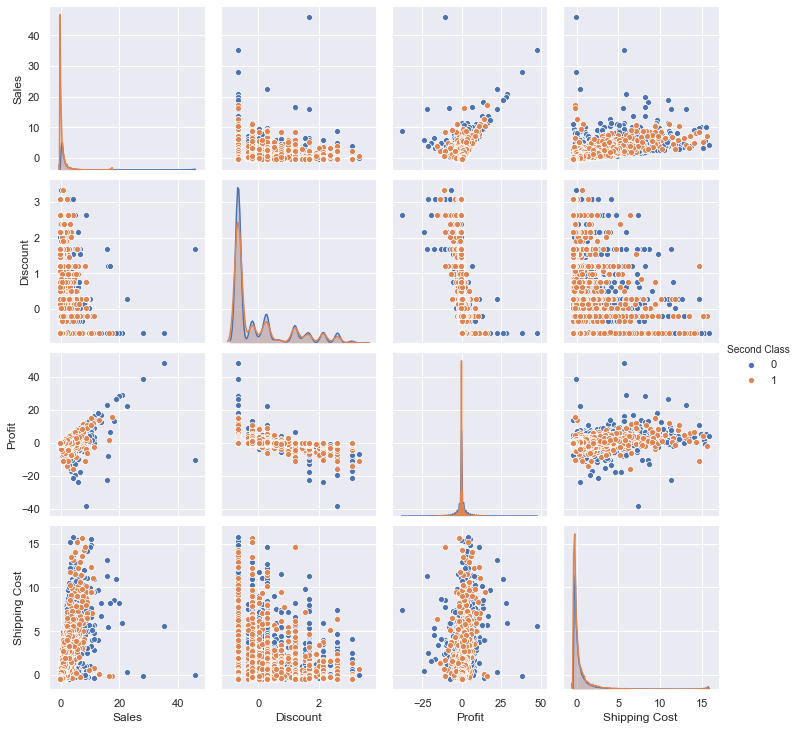

In [71]:
sns.pairplot(second_class, hue = 'Second Class')
plt.show()

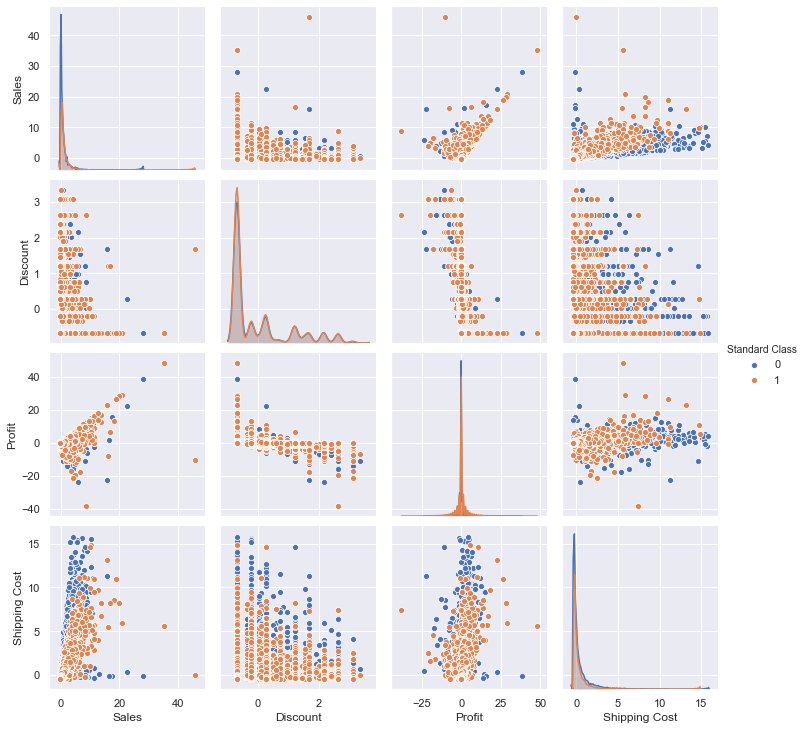

In [72]:
sns.pairplot(standard_class, hue = 'Standard Class')
plt.show()

In [76]:
df1.head()

,Sales,Quantity,Discount,Profit,shipping cost per unit,Consumer,Corporate,Home Office,Furniture,Office Supplies,Technology,APAC,Africa,Canada,EMEA,EU,LATAM,US
2,0.684007,-0.492511,-0.300575,0.654441,2.042500,1,0,0,0,1,0,0,0,0,1,0,0,0
3,0.116475,0.036866,-0.719430,0.478934,1.606667,0,0,1,0,1,0,0,0,0,0,1,0,0
5,1.582658,0.036866,-0.719430,0.901396,0.900000,1,0,0,0,1,0,1,0,0,0,0,0,0
14,1.007877,1.624996,1.793696,-1.830706,3.710000,1,0,0,0,1,0,1,0,0,0,0,0,0
15,-0.519807,-1.021888,-0.300575,0.336334,3.105000,0,1,0,0,0,1,0,0,0,0,0,1,0


In [77]:
data4 = df1.copy()
independent = data4.drop(data4.columns[4], axis = 1)
independent.head()

,Sales,Quantity,Discount,Profit,Consumer,Corporate,Home Office,Furniture,Office Supplies,Technology,APAC,Africa,Canada,EMEA,EU,LATAM,US
2,0.684007,-0.492511,-0.300575,0.654441,1,0,0,0,1,0,0,0,0,1,0,0,0
3,0.116475,0.036866,-0.719430,0.478934,0,0,1,0,1,0,0,0,0,0,1,0,0
5,1.582658,0.036866,-0.719430,0.901396,1,0,0,0,1,0,1,0,0,0,0,0,0
14,1.007877,1.624996,1.793696,-1.830706,1,0,0,0,1,0,1,0,0,0,0,0,0
15,-0.519807,-1.021888,-0.300575,0.336334,0,1,0,0,0,1,0,0,0,0,0,1,0


In [79]:
y = df1['shipping cost per unit']
x1 = independent

import statsmodels.api as sm

x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     shipping cost per unit   R-squared:                       0.121
Model:                                OLS   Adj. R-squared:                  0.120
Method:                     Least Squares   F-statistic:                     128.5
Date:                    Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                            19:25:17   Log-Likelihood:                -20517.
No. Observations:                   13126   AIC:                         4.106e+04
Df Residuals:                       13111   BIC:                         4.118e+04
Df Model:                              14                                         
Covariance Type:                nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.1625      0.014     81.929      0.000       1.135       1.190
Sales              -0.0099      0.011     -0.894      0.371      -0.031       0.012
Quantity           -0.0070      0.011     -0.634      0.526      -0.029       0.015
Discount            0.0017      0.014      0.125      0.900      -0.025       0.028
Profit              0.0172      0.013      1.285      0.199      -0.009       0.044
Consumer            0.3762      0.014     27.373      0.000       0.349       0.403
Corporate           0.3883      0.016     24.331      0.000       0.357       0.420
Home Office         0.3980      0.019     21.187      0.000       0.361       0.435
Furniture           0.5221      0.027     19.234      0.000       0.469       0.575
Office Supplies    -0.2197      0.017    -13.230      0.000      -0.252      -0.187
Technology          0.8601      0.031     28.051      0.000       0.800       0.920
APAC                0.1732      0.028      6.204      0.000       0.118       0.228
Africa              0.3048      0.033      9.201      0.000       0.240       0.370
Canada              0.6108      0.111      5.525      0.000       0.394       0.827
EMEA                0.3047      0.032      9.503      0.000       0.242       0.368
EU                  0.3258      0.028     11.432      0.000       0.270       0.382
LATAM              -0.0700      0.027     -2.624      0.009      -0.122      -0.018
US                 -0.4867      0.026    -18.793      0.000      -0.537      -0.436
==============================================================================
Omnibus:                     2345.868   Durbin-Watson:                   1.324
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3903.706
Skew:                           1.202   Prob(JB):                         0.00
Kurtosis:                       4.165   Cond. No.                     2.33e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.67e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [106]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=365)

In [107]:
from sklearn.linear_model import LinearRegression

In [108]:
reg = LinearRegression()
reg.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
y_hat = reg.predict(x_train)

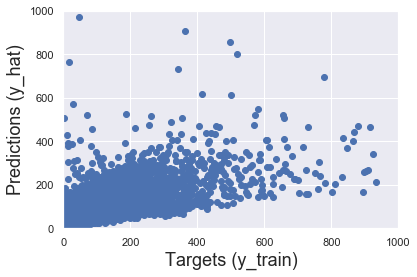

In [120]:
plt.scatter(y_train, y_hat)

plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

plt.xlim(0,1000)
plt.ylim(0,1000)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

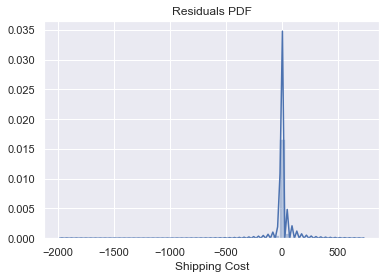

In [115]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF")

In [116]:
reg.intercept_

28.12840214010235

In [117]:
reg.coef_


array([42.7917932 ,  2.19658073, -1.05171029, -0.84363279,  0.50080372,
       -0.20034948,  1.53443084, -4.07487377,  2.54044293,  0.8643421 ,
        0.80168524,  1.08312256, -0.33693214,  0.27309907, -1.12961733,
       -1.5556995 ])

In [118]:
reg_summary = pd.DataFrame(independent.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Sales,42.791793
1,Quantity,2.196581
2,Discount,-1.051710
3,Profit,-0.843633
4,Corporate,0.500804
5,Home Office,-0.200349
6,Furniture,1.534431
7,Office Supplies,-4.074874
8,Technology,2.540443
9,APAC,0.864342
